### Introduction :
Pour comprendre cet article, vous avez besoin de quelques prérequis en python. Des connaissances de base en python et en logique vous aideront à assimiler l'ensemble de ce qui est présenté.

D'années en années, le monde du manga a pris de l'ampleur avec une évolution des ventes partout dans le monde. En effet on observe une augmentation de 7% des ventes de mangas de 2012 à 2019 au US(1) et une augmentation de 2.88% des exemplaires vendus entre 2014 et 2018 en France(2).
Ceci montre un intérêt grandissant pour ces œuvres japonaises au fil du temps. Un intérêt qui a su attirer l'attention de deux amateurs de data et de manga. En effet, vu la quantité de mangas que l'on retrouve sur internet, il est souvent difficile de déterminer la qualité de ceux-ci. Quel manga voir après que l'on est terminé la liste fournie par un ami? Nous avons donc décidé de travailler sur un système de recommandation qui serait basé sur l'historique de visualisation des utilisateurs.

In [ ]:
#Importation des bibliothèques nécessaires
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt


#Importation des données dans les fichiers csv
note = pd.read_csv('rating.csv', encoding = "utf-8") #Gestion des problèmes d'encodage
anime = pd.read_csv('anime.csv', encoding = "utf-8" )

In [2]:
#Importation des données dans les fichiers csv
note = pd.read_csv('rating.csv', encoding = "utf-8") #Gestion des problèmes d'encodage
anime = pd.read_csv('anime.csv', encoding = "utf-8" )

### Présentation des données
Nous avons retrouvé sur Kaggle (3) un dataset qui contient des informations sur les préférences des utilisateurs de 73 516 utilisateurs sur 12 294 animes. Le dataset est constitué de deux fichiers csv:
- Anime.csv contenant les colonnes suivantes: (le rating ici représente la note accordée par le site)

In [3]:
anime.head() #head() présente les 5 derniers éléments d'un dataframe

,anime_id,name,genre,type,episodes,rating,members
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630
1,5114,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV,64,9.26,793665
2,28977,Gintama°,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.25,114262
3,9253,Steins;Gate,"Sci-Fi, Thriller",TV,24,9.17,673572
4,9969,Gintama&#039;,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.16,151266


- Rating.csv : (le rating ici représente la note accordée par les utilisateurs)

In [4]:
note.tail() #Tail() présente les 5 derniers éléments d'un dataframe

,user_id,anime_id,rating
7813732,73515,16512,7
7813733,73515,17187,9
7813734,73515,22145,10
7813735,73516,790,9
7813736,73516,8074,9


Notre fichier data est simplement une fusion de ces deux fichiers suivant la colonne anime_id qu'ils ont en commun. Il sera utilisé comme dataset pour la suite de nos travaux.

In [5]:
data = pd.merge(anime,note,on = 'anime_id')
data.head() #rating_x représente le rating de anime (donc du site) et rating_y celui des utilisateurs

,anime_id,name,genre,type,episodes,rating_x,members,user_id,rating_y
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630,99,5
1,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630,152,10
2,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630,244,10
3,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630,271,10
4,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630,278,-1


### Présentation de la méthode :
#### - Modules utilisés : 
Les principaux modules pour ce projet ont été les suivants : 
- Pandas : 
    Pandas est une bibliothèque écrite pour le langage de programmation Python permettant la manipulation et l'analyse des données. Elle propose en particulier des structures de données et des opérations de manipulation de tableaux numériques et de séries temporelles.
- Matplotlib.pyplot :
    Matplotlib est une bibliothèque du langage de programmation Python destinée à tracer et visualiser des données sous formes de graphiques. Elle peut être combinée avec les bibliothèques python de calcul scientifique NumPy et SciPy.
- numpy : 
    NumPy est une extension du langage de programmation Python, destinée à manipuler des matrices ou tableaux multidimensionnels ainsi que des fonctions mathématiques opérant sur ces tableaux

#### - La méthode CRISP-DM :
- Présentation :
    CRISP-DM, qui signifie Cross-Industry Standard Process for Data Mining, est une méthode mise à l'épreuve sur le terrain permettant d'orienter vos travaux d'exploration de données.
    En tant que méthodologie, CRISP-DM comprend des descriptions des phases typiques d'un projet et des tâches comprises dans chaque phase, et une explication des relations entre ces tâches.
    En tant que modèle de processus, CRISP-DM offre un aperçu du cycle de vie de l'exploration de données.

- Les étapes de la méthode  :


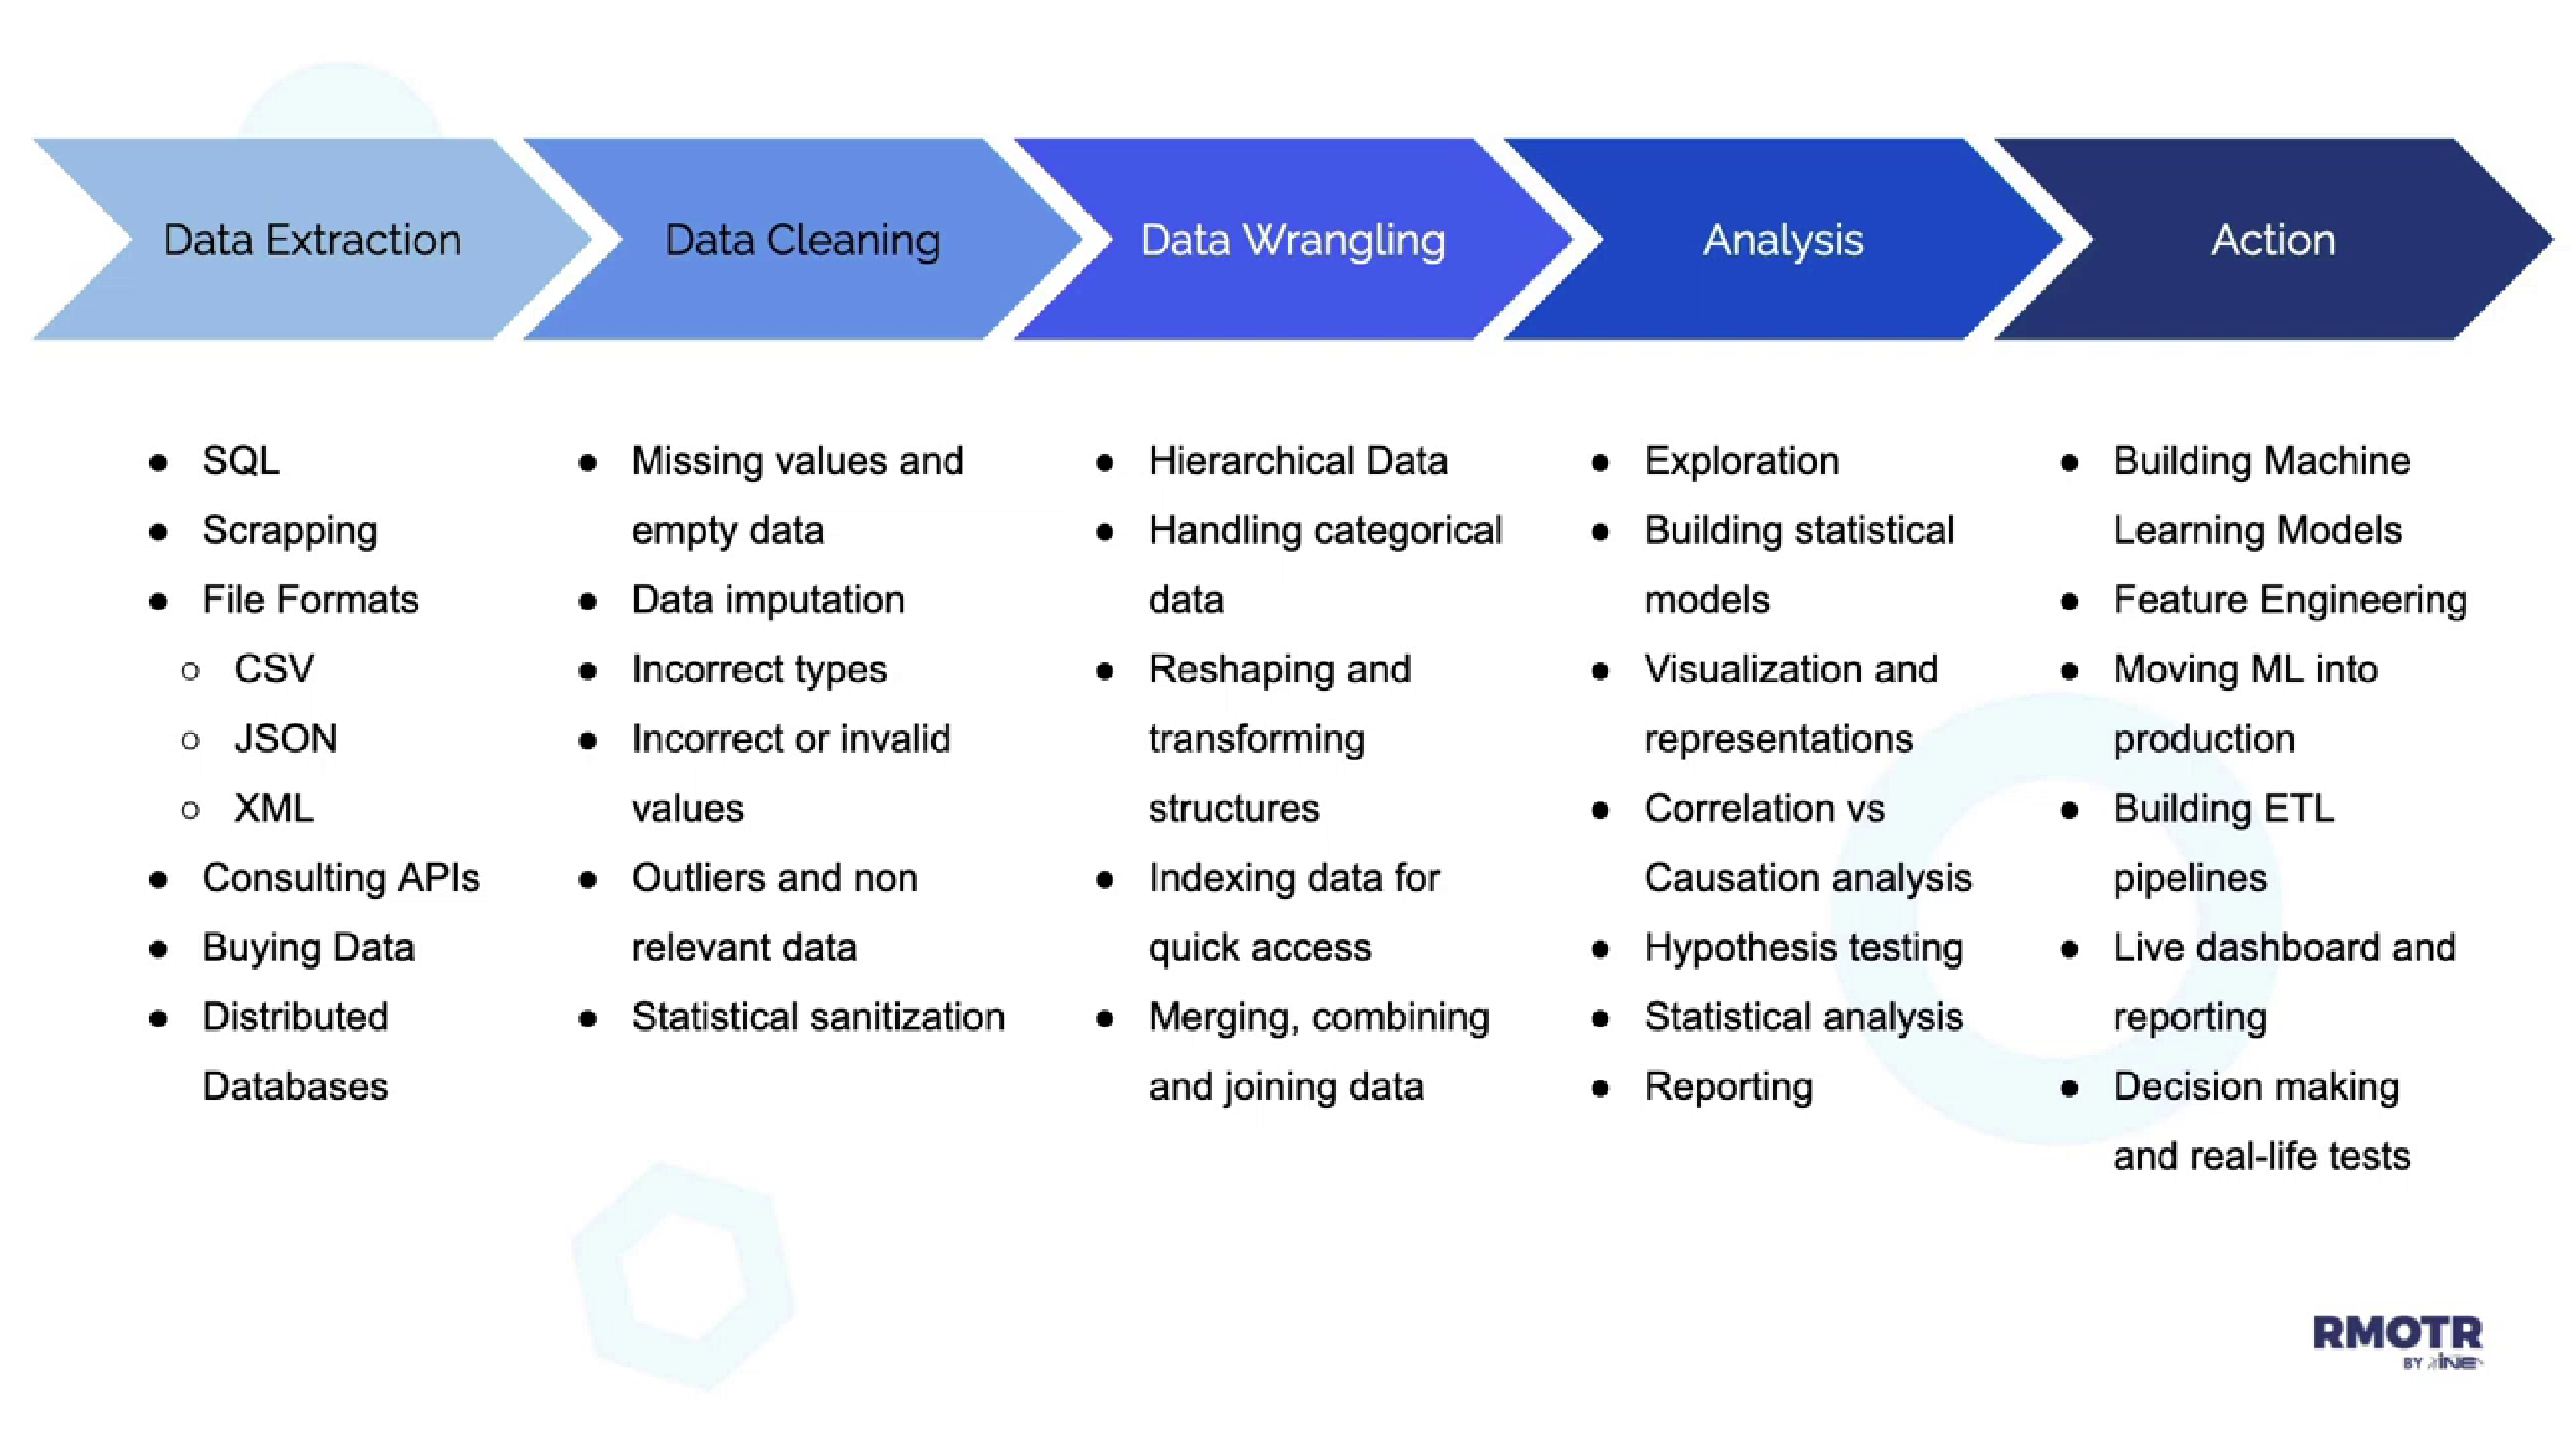

In [16]:
import matplotlib.image as mpimg

img = mpimg.imread('CRISP-DM.png')
fig = plt.figure(figsize = (60,35))
plt.axis('off')
imgplot = plt.imshow(img)

#### - Application à notre jeu de donnée :


Pour notre jeu de données, nous allons juste nous attarder sur quelques étapes :

In [8]:
data1 = data

In [9]:
#Attribution de nouveau nom pour bien distinguer les notes du site et ceux des utilisateurs
data1 = data1.rename(columns={"rating_y":"rating_user","rating_x":"rating_site"})

In [ ]:
data1["rating_user"][data1['rating_user'] == -1]= np.nan #Attribut la valeur Nan au valeur négative dans le rating_user
data1 = data1[data1["rating_user"].notnull()] #Enlève les valeurs non nulles de la colonne rating_user

In [11]:
#Code pour faire la moyenne des rating_user suivant l'anime

#Création d'un tableau contenant les différents anime_id uniques de data1
animeid = pd.DataFrame(data1.anime_id.unique()).sort_values(by=[0]).reset_index().drop(columns ='index')
#Pour éviter de louper un élément, je vais sort la colonne anime_id et ainsi être sur d'avoir regroupé l'ensemble des anime_id pour le for
data1 = data1.sort_values(by = ['anime_id'])

for x in enumerate(animeid[0]):
    idanime = x[1]
    #Obtient la moyenne des ratings users et remplace par l'ensemble des moyennes existantes
    data1.loc[data1['anime_id']==idanime, 'rating_user'] = data1[data1['anime_id']==idanime].rating_user.mean()
#Supprime les doublons et ne garde qu'un seul
data1 = data1.drop_duplicates(subset = 'anime_id', keep ='first', ignore_index = True)

In [12]:
#Supprime les colonnes inutiles
data1 = data1.drop(columns = ["name","anime_id","user_id"])

#Changement des valeurs de episodes de type object en type float
data1['episodes'] = pd.to_numeric(data1["episodes"], errors="coerce") 

#Transformation des lignes 'types' en colonnes avec pour valeur '1' en cas de correspondance et '0' dans le cas contraire
data1 = pd.merge(data1.reset_index(),pd.get_dummies(data1['type']).reset_index(),on = 'index') #pd.get_dummies assure la transformation
data1 = data1.drop(columns = ["index","type"]) #Supprime la colonne index (crée par le reset index) et la colonne type

#Changement en type 'str' sur la colonne genre du dataset anime et du dataset data1 pour faciliter la découpe
anime.genre = anime.genre.astype('str')
data1.genre = anime.genre.astype('str')

La colonne "genre" nous impose un traitement particulier. Afin de pouvoir rendre cette information exploitable, nous devons faire un traitement particulier.

In [ ]:
#Crée une liste incluant l'ensemble des différents genres retrouvables dans le tableau
m = []
for key, value in enumerate(anime.genre.values): 
    l = value.split(',') #Sépare chq string dans un bloc de strings avec comme pour facteur de séparation la virgule
    for p in l :
        m.append(p.strip()) #Efface l'espace dans les listes de strings et les ajoutes à une liste m

In [ ]:
from collections import Counter
dictgenre = dict(Counter(m)) #Crée un dictionnaire qui a pour clé le nombre d'occurences du genre et pour valeur le genre
datagenre = pd.DataFrame.from_dict(dictgenre.items()) #Transforme le dictionnaire en dataframe

In [ ]:
#Transformation des lignes de genre en colonnes avec des 0 et 1
for x in enumerate(datagenre[0]) : #Récupération d'un tuple venant de datagenre et contenant la classe et le genre
    genre = x[0]
    classe = x[1]
    for i in range(len(data1.genre)) :
        if genre in [j.strip() for j in data1.at[i,'genre'].split(',')] : #Vérification s'il le genre en cours de vérification appartient à celui de la ligne à la quelle on se trouve
            data1.at[i,classe] = 1 #Si appartenance, valeur = 1
        else :
            data1.at[i,classe] = 0 #Si non appartenance, valeur = 0
    break

In [13]:
data1 = data1.drop(columns = ["genre"])
data1 = data1.dropna().reset_index().drop(columns = "index") #Efface l'ensemble des nan restants et reset les index

### Présentation et analyses des graphiques

Pour faciliter la lecture et les interprétations liés aux graphiques, nous avons décidé d'arrondir notre rating_user à un chiffre après la virgule

In [16]:
#Importe la bibliothèque Math et crée une fonction Signif qui permet d'arrondir un nombre décimal à un chiffre après la virgule.
import math
def signif(x, digit):
    if x == 0:
        return 0
    return round(x, digit)

In [21]:
#Pour chaque ligne de la colonne rating_user, on remplace la valeur existante par son arrondi à 1 chiffre après la virgule.
data2.rating_user = data2.rating_user.apply(lambda v: signif(v,2))

Ensuite nous avons ressorti trois principaux graphiques:
- L'histogramme représentant la fréquence de répétitions des différents rating_user
- La matrice de correlations entre les différentes colonnes du dataset
- Le nuage de points entre les utilisateurs et le rating_site associé à la droite de regression.

In [24]:
#Pour la représentation, on crée un dataframe qui contiendra pour chaque note (en index), le nombre de répétitions associé
datarep = pd.DataFrame(data2['rating_user'].value_counts().iloc[0:80]).sort_index()

- L'histogramme des rating_user

    Le graphique ci-dessous représente l'histogramme des répétitions des notes des utilisateurs. On observe bien que la majorité des notes se trouve entre 6.0-8.0 avec un pic à 7.0. 

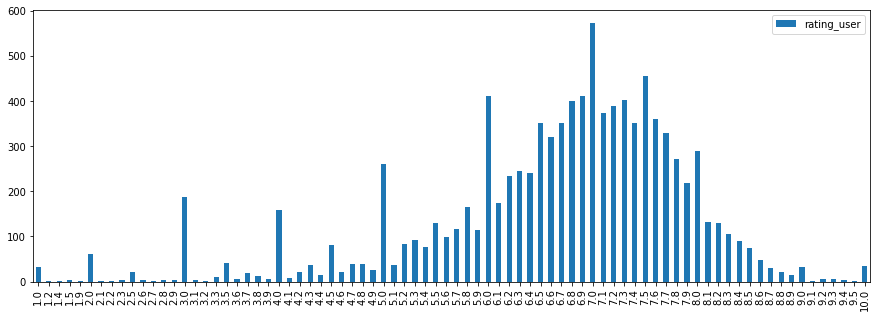

In [25]:
#Création d'un graphique qui représente les différentes notes et le nombre de fois qu'elles se repètent
datarep.plot.bar(figsize = (15,5)) 

- Matrice de correlations des colonnes

Le graphique suivant est un matrice de corrélation de l'ensemble des colonnes de notre tableau. Pour le faire, on importe la
bibliothèque seaborn qui contient une multitude de fonction pour produire des graphiques. Dans cette bibliothèque, on se sert de
la fonction heatmap. Cette fonction permet d'afficher un tableau avec un jeu de couleur permettant de facilement détecter les
valeurs les plus négatives ou positives du tableau. Il s'accompagne d'une légende. 

 Ce graphique suivant nous apprend qu'il existe une grande corrélation positive entre la note des utilisateurs et celle du site.
 Ceci donne lieu à deux hypothèses:
    - Soit les utilisateurs sont très influencés par la note du site lorsque ceux-ci notent un manga
    - Soit la notation des utilisateurs peut être utilisé de manière objective pour juger de la qualité d'un manga

In [ ]:
import seaborn as sns
sns.heatmap(data1.corr(), annot=True, fmt=".2f")
plt.show()

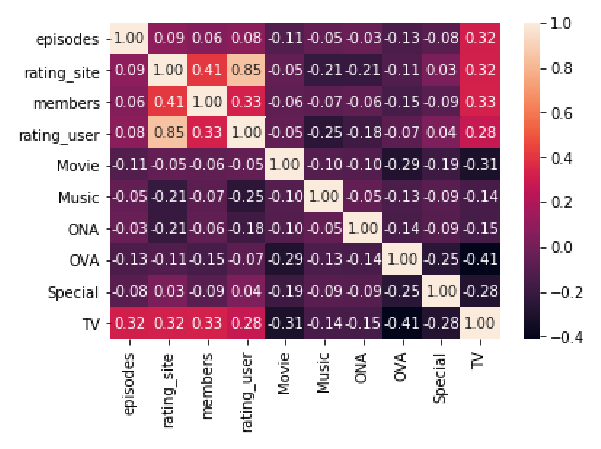

La légère corrélation positive qui existe entre le nombre d'utilisateurs et la notation du site nous indique que le nombre de membres n'est pas un indice de qualité suffisant pour un manga.Ceci est encore visible sur le prochain graphe

- Nuage de points et droite de regression

Ces graphiques nous confirment que le nombre d'utilisateurs n'a qu'une très légère influence sur la note du site. Sachant que la note du site et la note des utilisateurs est très corrélés, on peut donc dire que le nombre d'utilisateurs n'influe que très légèrement sur la note d'un manga. 

In [ ]:
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

X=data1.rating_site.to_numpy().reshape(-1, 1)
Y=data1.rating_user.to_numpy().reshape(-1, 1)

linear_regressor = LinearRegression()  # create object for the class
linear_regressor.fit(X, Y)  # perform linear regression
Y_pred = linear_regressor.predict(X)  # make predictions

fig = plt.figure(figsize = (15,10))
plt.scatter(X, Y)
plt.plot(X, Y_pred, color='red')
plt.show()

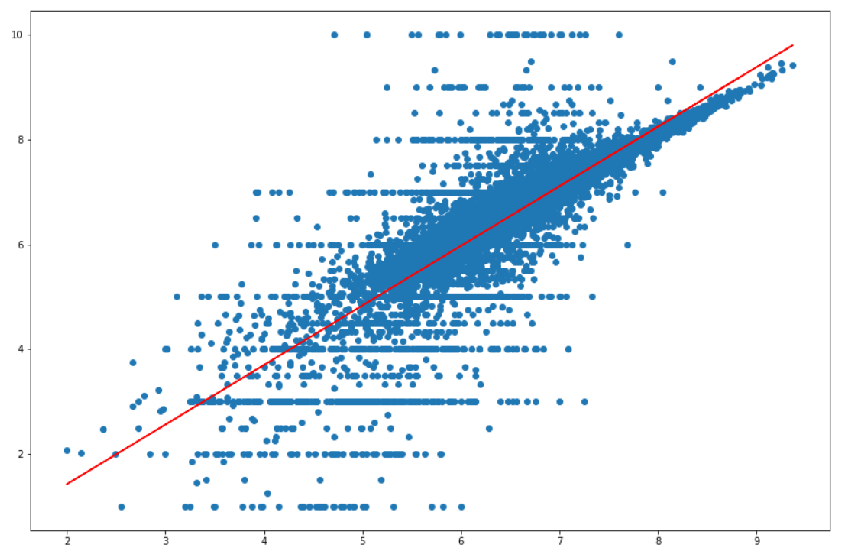

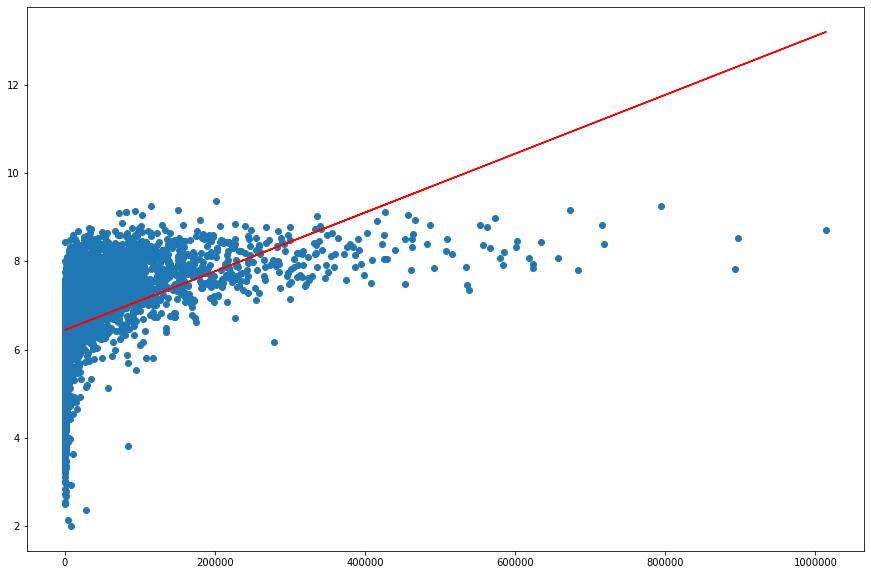

In [56]:
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

X=data1.members.to_numpy().reshape(-1, 1)
Y=data1.rating_site.to_numpy().reshape(-1, 1)

linear_regressor = LinearRegression()  # create object for the class
linear_regressor.fit(X, Y)  # perform linear regression
Y_pred = linear_regressor.predict(X)  # make predictions

fig = plt.figure(figsize = (15,10))
plt.scatter(X, Y)
plt.plot(X, Y_pred, color='red')
plt.show()

### - Hypothèses :

Les résultats obtenus nous permettent de poser les hypothèses suivantes :
- La popularité d'un anime ne garanti pas la qualité de ce mangas
- La qualité du mangas marquée par le site influe fortement l'avis d'un utiliateur.

Helas compte tenu de la limite de traitement du matériel utilisé pour ce projet, nous ne pouvons pas explorer encore plus les apports de chaque variable.

Sources:
- 1: https://www.npd.com/wps/portal/npd/us/news/press-releases/2019/sales-of-manga-books-are-on-the-rise-in-the-united-states-the-npd-group-says/
- 2: https://www.journaldujapon.com/2019/06/26/bilan-manga-2018-ventes-en-france-toujours-plus-haut/
- 3: https://www.kaggle.com/CooperUnion/anime-recommendations-database#rating.csv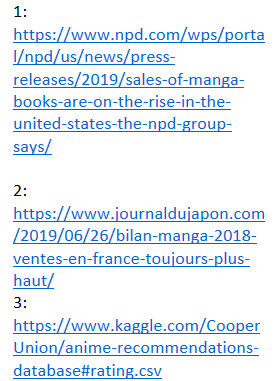